<div style="color:green; font-size:24px; font-weight:bold;"> *Dataset Source: [The New York Times GitHub Repository]  (https://github.com/nytimes/covid-19-data/blob/master/live/us-counties.csv)*
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>COVİD-19</b>📊 About the dataset</p>

- **date:** Date information.  
- **county:** County name.  
- **state:** State name.  
- **fips:** FIPS code of the county or state.  
- **cases:** Number of cases recorded on a specific date.  
- **deaths:** Number of deaths recorded on the same date.  

In [2]:
df = pd.read_csv("us-counties.csv")
df.head()

,date,county,state,fips,cases,deaths
0,2023-03-24,McPherson,South Dakota,46089.0,534,16.0
1,2023-03-24,Meade,South Dakota,46093.0,8404,68.0
2,2023-03-24,Mellette,South Dakota,46095.0,654,8.0
3,2023-03-24,Miner,South Dakota,46097.0,542,15.0
4,2023-03-24,Jennings,Indiana,18079.0,8178,119.0


In [3]:
df1 = df.copy()

In [4]:
from skimpy import skim

In [161]:
skim(df) 

# General overview of this dataset

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3257   │ │ int64       │ 4     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean     ┃ sd     ┃ p0   ┃ p25     ┃ p50     ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ fips              │  40 │  1.23 │    31500 │  16370 │ 1001 │   19040 │   30030 │  46120 │   78030 │ ▅▇▇▇▂▁ │  │
│ │ cases             │   0 │     0 │    31900 │ 120900 │    0 │    3187 │    8064 │  20960 │ 3723000 │   ▇    │  │
│ │ deaths            │   0 │     0 │    348.6 │   1323 │    0 │      44 │     109 │    258 │   45120 │   ▇    │  │
│ │ Year              │   0 │     0 │     2023 │      0 │ 2023 │    2023 │    2023 │   2023 │    2023 │     ▇  │  │
│ │ Month             │   0 │     0 │        3 │      0 │    3 │       3 │       3 │      3 │       3 │     ▇  │  │
│ │ moving_avg        │   6 │  0.18 │      349 │  565.2 │    0 │   117.3 │   201.6 │  373.2 │    7872 │   ▇    │  │
│ │ case_death_ratio  │   0 │     0 │  0.06446 │  2.838 │    0 │ 0.01016 │ 0.01346 │ 0.0174 │     162 │   ▇    │  │
│ └───────────────────┴─────┴───────┴──────────┴────────┴──────┴─────────┴─────────┴────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ is_weekend                         │               0 │                             0 │           ▇         │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ county                    │       0 │          0 │                          1.1 │                     3580 │  │
│ │ state                     │       0 │          0 │                          1.2 │                     3800 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3257 non-null   object 
 1   county  3257 non-null   object 
 2   state   3257 non-null   object 
 3   fips    3217 non-null   float64
 4   cases   3257 non-null   int64  
 5   deaths  3179 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 152.8+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
pd.DataFrame({
    'Count': df.count(),
    'Null': df.isnull().sum(),
    'nunique': df.nunique()
})

,Count,Null,nunique
date,3257,0,1
county,3257,0,1932
state,3257,0,56
fips,3217,40,3217
cases,3257,0,3077
deaths,3179,78,829


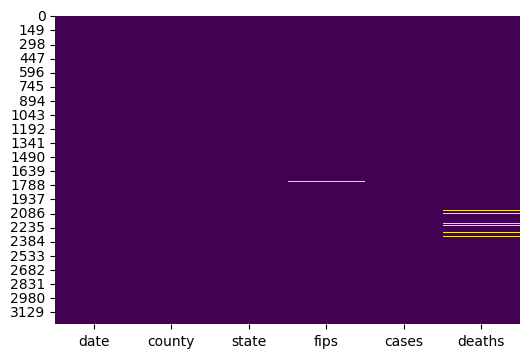

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.show()

# The heatmap of missing values.

In [11]:
df.sample(5)

,date,county,state,fips,cases,deaths
839,2023-03-24,Perquimans,North Carolina,37143.0,3577,51.0
1730,2023-03-24,Jefferson,Georgia,13163.0,4264,122.0
1304,2023-03-24,Levy,Florida,12075.0,12803,194.0
1412,2023-03-24,Creek,Oklahoma,40037.0,22900,365.0
2840,2023-03-24,Franklin,Washington,53021.0,36948,228.0


In [20]:
df["date"] = pd.to_datetime(df["date"])

# "it was converted the 'data' column from type object to datetime type."

In [14]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

# New columns were created for analysis based on time series.

In [15]:
df.head()

,date,county,state,fips,cases,deaths,Year,Month,Day
0,2023-03-24,McPherson,South Dakota,46089.0,534,16.0,2023,3,24
1,2023-03-24,Meade,South Dakota,46093.0,8404,68.0,2023,3,24
2,2023-03-24,Mellette,South Dakota,46095.0,654,8.0,2023,3,24
3,2023-03-24,Miner,South Dakota,46097.0,542,15.0,2023,3,24
4,2023-03-24,Jennings,Indiana,18079.0,8178,119.0,2023,3,24


In [24]:
df['deaths'] = df['deaths'].fillna(0)

# The missing values in the 'deaths' column were filled based on statistical analysis to determine the correlation between case and death rates.

In [ ]:
df['deaths'] = df['deaths'].astype(int)

# Afterward, we converted the data type from float to int.

In [26]:
df.dtypes

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths             int64
Year               int32
Month              int32
Day                int32
dtype: object

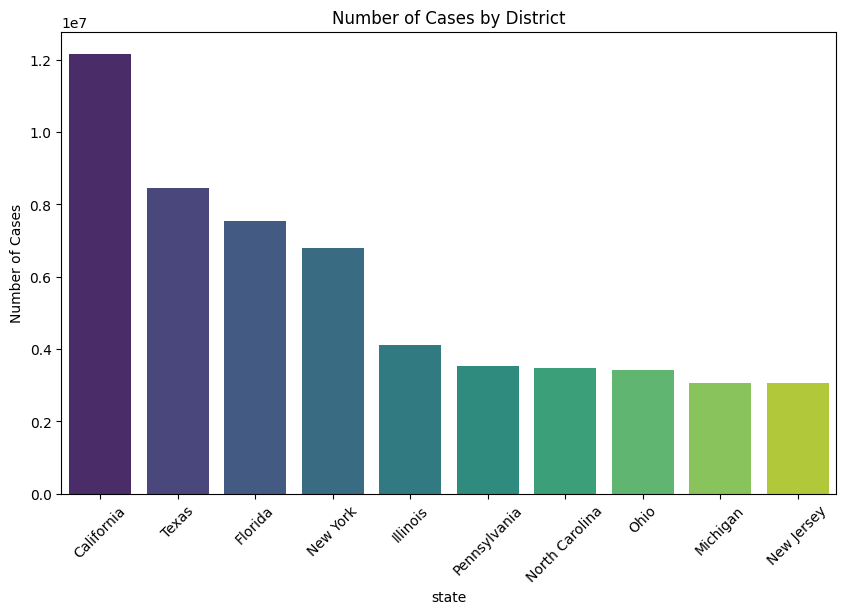

In [162]:
top_states = df.groupby('state')['cases'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='state', y='cases', data=top_states, palette='viridis')


plt.xlabel('state')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by District')
plt.xticks(rotation=45)
plt.show()

- 🎯  The highest number of cases was observed in California by county. This may be due to California's warmer climate conditions.
- 🎯 Similarly, in Texas and Florida, the climate conditions are warmer compared to other counties.
- 🎯 Although New York is more centrally located, the colder climate conditions result in fewer cases compared to other states.

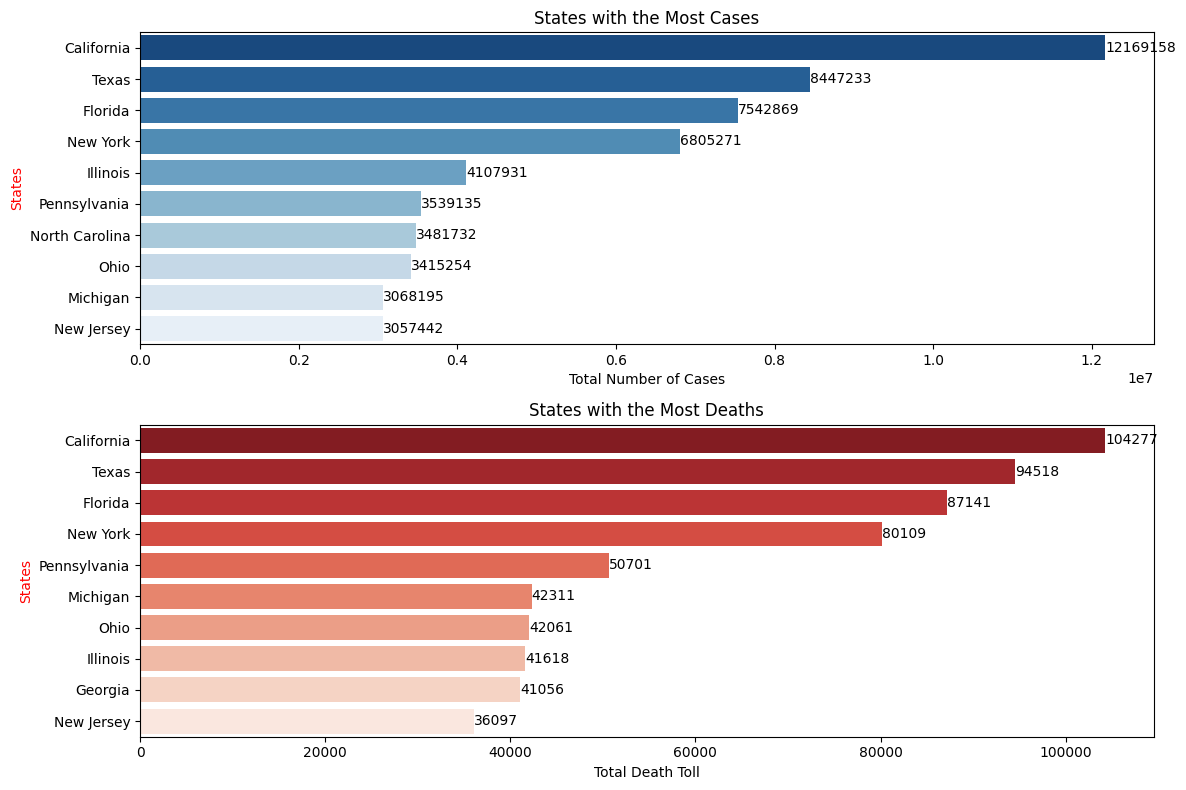

In [78]:
total_cases = df.groupby('state')['cases'].sum().reset_index().sort_values(by='cases', ascending=False).head(10)


total_deaths = df.groupby('state')['deaths'].sum().reset_index().sort_values(by='deaths', ascending=False).head(10)


fig, axes = plt.subplots(2, 1, figsize=(12,8))  


sns.barplot(x='cases', y='state', data=total_cases, palette='Blues_r', ax=axes[0])
axes[0].set_xlabel('Total Number of Cases')
axes[0].set_ylabel('States', color = "red")
axes[0].set_title('States with the Most Cases')

for index, value in enumerate(total_cases['cases']):
    axes[0].text(value + 5, index, str(value), va='center', color='black')


sns.barplot(x='deaths', y='state', data=total_deaths, palette='Reds_r', ax=axes[1])
axes[1].set_xlabel('Total Death Toll')
axes[1].set_ylabel('States', color = "red")  
axes[1].set_title('States with the Most Deaths')

for index, value in enumerate(total_deaths['deaths']):
    axes[1].text(value + 1, index, str(value), va='center', color='black')

plt.tight_layout()
plt.show()

- 🎯 California, Texas, Florida, and New York have higher case and death numbers compared to other states.
- 🎯 In Illinois, the county with the highest number of cases is ranked 5th, while the county with the highest number of deaths is ranked 8th."
- 🎯 In North Carolina, the county with the highest number of cases is ranked 7th, while the death count by county is lower, and it does not fall within the top 10.
- 🎯 In Georgia, the case numbers are not in the top 10 by county, while the death numbers are in the top 10.
- 🎯 In Michigan, the case numbers are ranked 9th compared to other states, while the death numbers have risen to 5th place.

In [93]:
import folium
from folium.plugins import HeatMap


latitude = 37.0902
longitude = -95.7129


m = folium.Map(location=[latitude, longitude], zoom_start=5)


state_coordinates = [
    [41.6032, -99.1332],  # Nebraska
    [40.7128, -74.0060],  # New York
    [34.0522, -118.2437],  # California
    [41.8781, -87.6298],  # Illinois
    [29.7604, -95.3698],  # Texas
    [39.7392, -104.9903],  # Colorado
    [42.3601, -71.0589],  # Massachusetts
    [39.9526, -75.1652],  # Pennsylvania
    [33.4484, -112.0740],  # Arizona
    [32.7767, -96.7970],  # Texas
    [36.1627, -86.7816],  # Tennessee
    [41.0151, -73.6753],  # Connecticut
    [44.3106, -89.6446],  # Wisconsin
    [40.2989, -74.5210],  # Delaware
    [42.9837, -81.2497],  # Michigan
    [35.4676, -97.5151],  # Oklahoma
    [37.7749, -122.4194],  # San Francisco
]


HeatMap(state_coordinates).add_to(m)

m.save('usa_states_heatmap.html')
m


In [107]:
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)


state_coordinates = {
    'Nebraska': [41.6032, -99.1332],
    'New York': [40.7128, -74.0060],
    'California': [34.0522, -118.2437],
    'Illinois': [41.8781, -87.6298],
    'Texas': [29.7604, -95.3698],
    'Colorado': [39.7392, -104.9903],
    'Massachusetts': [42.3601, -71.0589],
    'Pennsylvania': [39.9526, -75.1652],
    'Arizona': [33.4484, -112.0740],
    'Tennessee': [36.1627, -86.7816]
}


for index, row in df.iterrows():
    state_name = row['state']
    if state_name in state_coordinates:
        folium.Marker(
            location=state_coordinates[state_name],
            popup=f"State: {state_name}\nNumber of cases: {row['cases']}\nNumber of Deaths: {row['deaths']}",
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(m)

# Haritayı kaydet
m.save('usa_states_with_data.html')
m

- 🎯 The map clearly displays the case and death numbers by state.

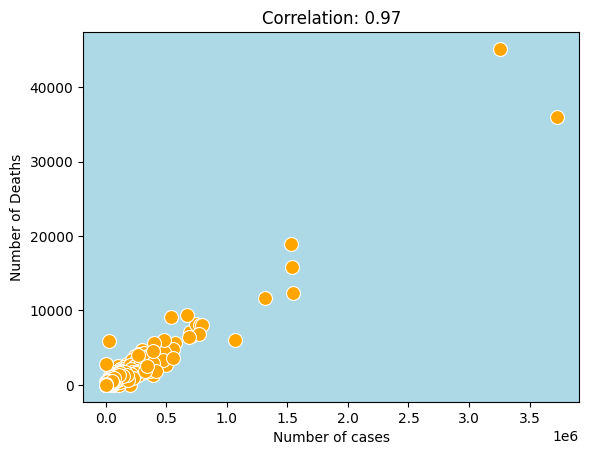

In [ ]:
df['days'] = pd.to_datetime(df['days'], errors='coerce')

df['is_weekend'] = df['days'].dt.weekday.isin([5, 6]) 

correlation = df['cases'].corr(df['deaths'])

sns.scatterplot(x='cases', y='deaths', data=df, s = 100, color ="orange")

plt.gca().set_facecolor('lightblue')  
plt.xlabel('Number of cases')
plt.ylabel('Number of Deaths')
plt.title(f'Correlation: {correlation:.2f}')

plt.show()


- 🎯 The correlation between cases and deaths is 0.97.
- 🎯 There is a strong positive correlation between the increase in case numbers and the number of deaths.
- 🎯 In other words, as case numbers increase, a significant increase in the number of deaths can also be observed.

<a id='understanding-dataset'></a>
# <p style="background-color:red;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>About Analysis by Dataset</b></p>

- 🎯 All data has been entered within the same time period.

- 🎯 "The time intervals of when individuals contracted the virus were not specified."

- 🎯 "The age groups of the infected individuals were not specified."

- 🎯 "The locations of infected individuals are only specified at the state level. Therefore, it was not possible to analyze the correlation between rural and urban areas."

- 🎯  In this dataset, the analysis was limited to the correlation between cases and deaths because the necessary information, such as the timing of cases and age groups of infected individuals, was not available.


## This dataset was used for educational purposes.

- https://www.kaggle.com/zeripek 

- https://www.kaggle.com/ozanmhrc

- https://www.kaggle.com/abdullahkse